In [90]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import chess
import networkx as nx
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
board = chess.Board()

game = "d4"

df = pd.read_csv(f"{game}.csv", header=None, delimiter=",").fillna('').applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)


df




,0,1,2,3,4
0,d4,,,,
1,Nf6,,,,
2,c4,,,,
3,e6,,,,
4,Nf3,,,,
5,d5,b6,c6,b6,c6
6,Nc3,Nc3,test,test,test
7,Nc3,Nc3,test,blub2,blub2


In [122]:
# Create an empty directed graph
G = nx.DiGraph()

games = 1

root = df.iloc[0,0]

G.add_node(root)

prev = [root]

# Iterate over each row in the dataframe
for i, row in df.iterrows():
    if i > 0: # skip first move
        moves = row
        for j in range(len(moves)):
            node = f"{i+1},{j+1}_{moves[j]}"

            if moves[j] != "":

                G.add_node(node)  # Add the current move as a node
                
                if j > 0:
                    if moves[j] in list(moves[:j]):

                        if games == j:
                            G.remove_node(node)
                            duplicate = node

                            print("hallo", j, games, f"duplicate: {node}")

                if (j+1) > games:
                    games  += 1

                    prev += [root]
                    
                print(i,games, node, prev)

                prev[j] = node




 
games

1 1 2,1_Nf6 ['d4']
2 1 3,1_c4 ['2,1_Nf6']
3 1 4,1_e6 ['3,1_c4']
4 1 5,1_Nf3 ['4,1_e6']
5 1 6,1_d5 ['5,1_Nf3']
5 2 6,2_b6 ['6,1_d5', 'd4']
5 3 6,3_c6 ['6,1_d5', '6,2_b6', 'd4']
hallo 3 3 duplicate: 6,4_b6
5 4 6,4_b6 ['6,1_d5', '6,2_b6', '6,3_c6', 'd4']
hallo 4 4 duplicate: 6,5_c6
5 5 6,5_c6 ['6,1_d5', '6,2_b6', '6,3_c6', '6,4_b6', 'd4']
6 5 7,1_Nc3 ['6,1_d5', '6,2_b6', '6,3_c6', '6,4_b6', '6,5_c6']
6 5 7,2_Nc3 ['7,1_Nc3', '6,2_b6', '6,3_c6', '6,4_b6', '6,5_c6']
6 5 7,3_test ['7,1_Nc3', '7,2_Nc3', '6,3_c6', '6,4_b6', '6,5_c6']
6 5 7,4_test ['7,1_Nc3', '7,2_Nc3', '7,3_test', '6,4_b6', '6,5_c6']
6 5 7,5_test ['7,1_Nc3', '7,2_Nc3', '7,3_test', '7,4_test', '6,5_c6']
7 5 8,1_Nc3 ['7,1_Nc3', '7,2_Nc3', '7,3_test', '7,4_test', '7,5_test']
7 5 8,2_Nc3 ['8,1_Nc3', '7,2_Nc3', '7,3_test', '7,4_test', '7,5_test']
7 5 8,3_test ['8,1_Nc3', '8,2_Nc3', '7,3_test', '7,4_test', '7,5_test']
7 5 8,4_blub2 ['8,1_Nc3', '8,2_Nc3', '8,3_test', '7,4_test', '7,5_test']
7 5 8,5_blub2 ['8,1_Nc3', '8,2_Nc3', '8,3_te

5

In [36]:
print(G)

DiGraph with 7 nodes and 0 edges


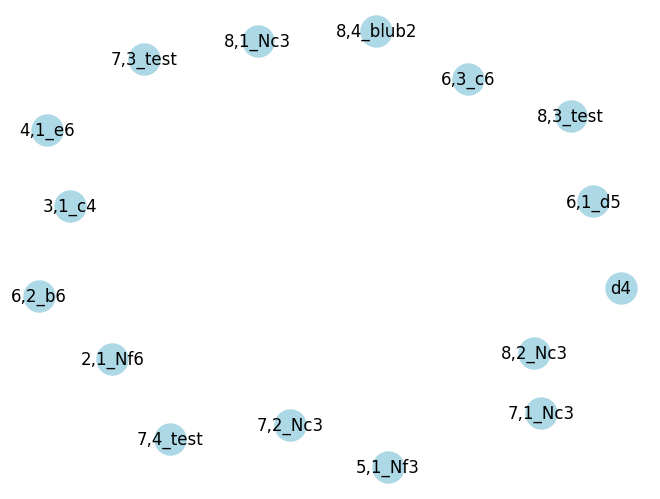

In [105]:
# Draw the graph
pos = nx.spring_layout(G)  # Define the layout for the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

# Show the graph in Jupyter Notebook
plt.show()